In [1]:
%pip install pandas
%pip install sklearn
%pip install xgboost

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [3]:

df= pd.read_csv("final_dataset.csv")


In [4]:
df.dropna(inplace=True)
features = df.drop(columns='Target')
target=df['Target']

In [5]:
X_train,X_test, y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [6]:
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# 3. make predictions
y_pred       = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:22:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy:     0.8927536231884058
ROC AUC:      0.9563866698942952

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       102
           1       0.91      0.94      0.93       243

    accuracy                           0.89       345
   macro avg       0.88      0.86      0.87       345
weighted avg       0.89      0.89      0.89       345



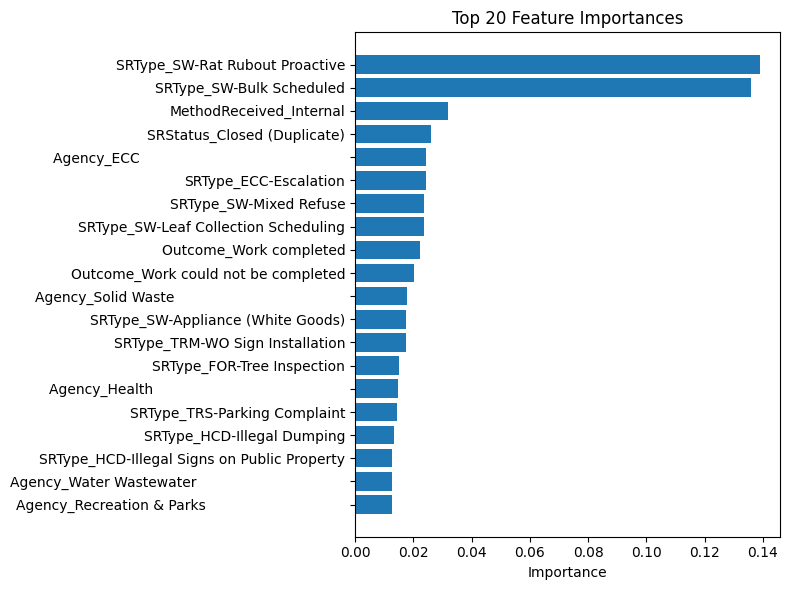

In [7]:
# 4. evaluate
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("ROC AUC:     ", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. plot feature importances
plt.figure(figsize=(8,6))
importances = model.feature_importances_
indices     = importances.argsort()[::-1]
plt.barh(
    [features.columns[i] for i in indices[:20]][::-1],
    importances[indices][:20][::-1]
)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# assume `model` is your trained XGBClassifier
importances = pd.Series(
    model.feature_importances_,
    index=features.columns
)

# extract the “base name” of each dummy, e.g. drop everything after the first underscore
orig_vars = importances.index.str.split('_', 1).str[0]

# sum importances per original variable
col_importance = importances.groupby(orig_vars).sum().sort_values(ascending=False)

print(col_importance)


TypeError: StringMethods.split() takes from 1 to 2 positional arguments but 3 were given